<a href="https://colab.research.google.com/github/SophiaBieri/MLfEA-Project-2-Submission/blob/main/Logistic_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this file, we are using the pre-processed accidents data to analyse the relationship between the underlying variables. Especially, it is our aim to assess the behaviour of the features in their co-existence with other features, portray the predictive power of multiple classification models as well assign importance to selected feature variables with respect to their effect on the variable of interest. Doing so, we will perform a short data analysis to visually inspect patterns, obtain relation strengths through application of numerous classification algorithms and perform a type of feature selection in which we assign feature importance through a range of selection techniques. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import matplotlib.lines as mlines
import statsmodels.api as sm

from sklearn import datasets
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from scipy.stats import norm, bernoulli

In [ ]:
from google.colab import files
dataset_file_dict = files.upload()

Saving UK_accidents_preprocessed.csv to UK_accidents_preprocessed.csv


## Data Analysis

In this part, we will quickly analyse the underlying behaviour of our feature variables to assess their distributional forms, observe their co-existance with other variables and define, through visual inspection, to what degree individual features might have an impact on the classification framework. As such, we will perform a first analysis that is likely to give preliminary results expected to be captured by the subsequent models for prediciton and selection. 

### Model Parameters

As was shortly introduced in the data preparation notebook, we obtain a dataset consisting of 14 feature variables. These are: 

- Accident Severity: A 3-level categorical character string indicating the severity of an accident. Ranging from Slight over Severe to Lethal. 

- Light Conditions: A categorical variable covering 7 specific light conditions. 

- Weather Conditions: A categorical variable covering 7 specific weather conditions.

- Road Surface Conditions: A categorical variable covering 5 specific surface conditions. 

- Hour of day: A continuous variable previously defined as "time of accident". This variable was transformed into hourly intervals to obtain a better interpretability and improve policy predictions. As such, we defined 24 intervals covering each hour of the day. 

- Day of Week:  A categorical variable covering the 7 specific days of the week which are indicated as Monday to Sunday. 

- Sex of Driver: The gender of the driver causing the accident, given as male or female.

- Age of Driver: A categoorical variable covering the age of the driver in bins of 5-10 years, respectively. Starting at 18-20, then in 5-10 year intervals approaching 75 and ending on 75+. 

- Speed Limit: The respective speed limit where the accident occured. 

- Vehicle Type: A categorical variable previously given by multiple sub-categories for cars and motorcycles. These sub-categories were merged into either the major category cars or motorcycles. 

- Engine Capacity: The engine capacity of the vehicle causing the accident. Defined individually for cars and motorcycles. Both categories are assigned into a 4-level cluster. 

- Junction Detail: Covers details on environment surrounding the accident. Summarised into a 3-level categorical feature with levels junction, open street and roundabout. This is to indicate in which street setting the accident took place. 

- Multiple Vehicles involved: A binary feature indicating 1 if more than one car was involved in the accident. 

- Month + Year: Features indicating in which month and which year the accident occured. 

- Age of vehicle: A categorical feature indicating the age of the vehicle at accident date. Binned into 4 levels, ranging from 0-1 to +10 years. 

We will now perform a short data analysis with these features. 

In [ ]:
acc = pd.read_csv('UK_accidents_preprocessed.csv')
acc.count()

Accident_Index                1482372
Accident_Severity             1482372
Road_Class                    1482372
Speed_limit                   1482372
Junction_Detail               1482372
Light_Conditions              1482372
Weather_Conditions            1482372
Road_Surface_Conditions       1482372
Hour_of_Day                   1482372
Year                          1482372
Month                         1482372
Day_of_Week                   1482372
Multiple_Vehicles_involved    1482372
Urban_Area                    1482372
Vehicle_Type                  1482372
Sex_of_Driver                 1482372
Age_of_Driver                 1482372
Engine_Capacity_(CC)          1482372
Age_of_Vehicle                1482372
dtype: int64

In [ ]:
acc.describe()

,Speed_limit,Hour_of_Day,Year,Month,Multiple_Vehicles_involved,Urban_Area
count,1.482372e+06,1.482372e+06,1.482372e+06,1.482372e+06,1.482372e+06,1.482372e+06
mean,3.922839e+01,1.362957e+01,2.011485e+03,6.617869e+00,7.076746e-01,6.281608e-01
std,1.429680e+01,5.193850e+00,4.273592e+00,3.444451e+00,4.548312e-01,4.832959e-01
min,1.000000e+01,0.000000e+00,2.005000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,1.000000e+01,2.008000e+03,4.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+01,1.400000e+01,2.011000e+03,7.000000e+00,1.000000e+00,1.000000e+00
75%,5.000000e+01,1.700000e+01,2.015000e+03,1.000000e+01,1.000000e+00,1.000000e+00
max,7.000000e+01,2.300000e+01,2.019000e+03,1.200000e+01,1.000000e+00,1.000000e+00


In [ ]:
# Relabel the day of the week to make graphs
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Monday'] = '1 Monday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Tuesday'] = '2 Tuesday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Wednesday'] = '3 Wednesday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Thursday'] = '4 Thursday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Friday'] = '5 Friday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Saturday'] = '6 Saturday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 'Sunday'] = '7 Sunday'

# Relabel the Engine capacities to make graphs
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '0-125cc'] = '1. 0-125cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '126-350cc'] = '2. 126-350cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '351-600cc'] = '3. 351-600cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '601-1150cc'] = '4. 601-1150cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '1151-1999cc'] = '5. 1151-1999cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '2000-2999cc'] = '6. 2000-2999cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '3000-3999cc'] = '7. 3000-3999cc'
acc['Engine_Capacity_(CC)'].loc[acc['Engine_Capacity_(CC)'] == '>4000cc'] = '8. >4000cc'

# Bring them into the desired format
acc = acc.astype(object)
acc[['Multiple_Vehicles_involved','Urban_Area']] = acc[['Multiple_Vehicles_involved','Urban_Area']].astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
acc.dtypes

Accident_Index                object
Accident_Severity             object
Road_Class                    object
Speed_limit                   object
Junction_Detail               object
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Hour_of_Day                   object
Year                          object
Month                         object
Day_of_Week                   object
Multiple_Vehicles_involved     int64
Urban_Area                     int64
Vehicle_Type                  object
Sex_of_Driver                 object
Age_of_Driver                 object
Engine_Capacity_(CC)          object
Age_of_Vehicle                object
dtype: object

### Exploratory Data Analysis 

We now perform some exploratory data analysis to depict preliminary patterns in the data.

In [ ]:
def get_severity_plot():
  # Set figure size
  plt.rcParams["figure.figsize"] = (4,6)

  # Set width of bar
  barWidth = 0.9

  # Set height of bar as the number of the total of accidents from the respective severity class
  bars1 = acc.loc[acc['Accident_Severity'] == 'Slight', :].shape[0] # Counts for slight accidents
  bars2 = acc.loc[acc['Accident_Severity'] == 'Serious', :].shape[0] # Shares for serious accidents
  bars3 = acc.loc[acc['Accident_Severity'] == 'Fatal', :].shape[0] # Shares for lethal accidents
 
  # Set position of bar on X axis
  r1 = 1
  r2 = 2
  r3 = 3
  # Make the plot
  plt.bar(r1, bars1, color='dodgerblue', width=barWidth, edgecolor='white', label='Slight')
  plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='Serious')
  plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Fatal')
 
  # Add ticks
  plt.xlabel('Severity', fontweight='bold')
  plt.xticks([1,2,3], ['Slight','Serious','Fatal'], rotation='vertical')
  plt.ylabel('Frequency', fontweight='bold')

  # Add title
  #plt.title(feature, fontweight='bold')

  # Create legend & Show graphic
  plt.legend()
  plt.show()

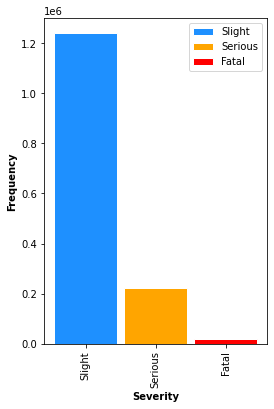

In [ ]:
get_severity_plot()

In [ ]:
def getcounts_as_barplot(n_feature = 2, sort_alphabetically = False):
  # Define the feature for which the counts should be visualized
  feature = acc.columns[n_feature]

  # Get the counts and merge everything together
  count1 = np.unique(acc.loc[acc['Accident_Severity'] == 'Slight', feature], return_counts=True)
  count1 = pd.DataFrame.from_records(np.array([count1[0].tolist(), count1[1].tolist()]).T)
  count2 = np.unique(acc.loc[acc['Accident_Severity'] == 'Serious', feature], return_counts=True)
  count2 = pd.DataFrame.from_records(np.array([count2[0].tolist(), count2[1].tolist()]).T)
  count3 = np.unique(acc.loc[acc['Accident_Severity'] == 'Fatal', feature], return_counts=True)
  count3 = pd.DataFrame.from_records(np.array([count3[0].tolist(), count3[1].tolist()]).T)
  df = count1.merge(count2, on=0).merge(count3, on=0)
  for col in range(3):
    df[df.columns[col+1]] = df[df.columns[col+1]].astype(int)

  if sort_alphabetically:
    # Sort the categories of the feature according to the alphabetical order of the feature categories
    df = df.sort_values(0, ascending=True)
  else:
    # Sort the categories of the feature according to the counts observed for slight accidents
    df = df.sort_values('1_x', ascending=False)

  # Set figure size
  plt.rcParams["figure.figsize"] = (8,6)

  # Set width of bar
  barWidth = 0.25

  # Set height of bar as the share of the total number of accidents from the respective severity class that occured within the feature's categories
  bars1 = df.iloc[:,1]/df.iloc[:,1].sum() # Shares for slight accidents
  bars2 = df.iloc[:,2]/df.iloc[:,2].sum() # Shares for serious accidents
  bars3 = df.iloc[:,3]/df.iloc[:,3].sum() # Shares for lethal accidents
 
  # Set position of bar on X axis
  r1 = np.arange(len(bars1))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
 
  # Make the plot
  plt.bar(r1, bars1, color='dodgerblue', width=barWidth, edgecolor='white', label='Slight')
  plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='Serious')
  plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Fatal')
 
  # Add ticks
  plt.xlabel(feature, fontweight='bold')
  plt.xticks([r + 1.1*barWidth for r in range(len(bars1))], df.iloc[:,0], rotation='vertical')
  plt.ylabel('Class-conditional Density', fontweight='bold')

  # Add title
  #plt.title(feature, fontweight='bold')

  # Create legend & Show graphic
  plt.legend()
  plt.show()

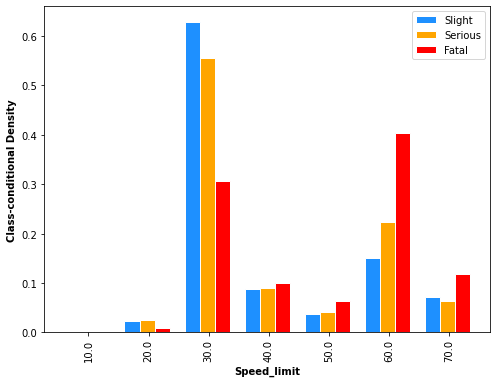

In [ ]:
# Speed_limit Histogram
getcounts_as_barplot(n_feature = 3, sort_alphabetically = True)

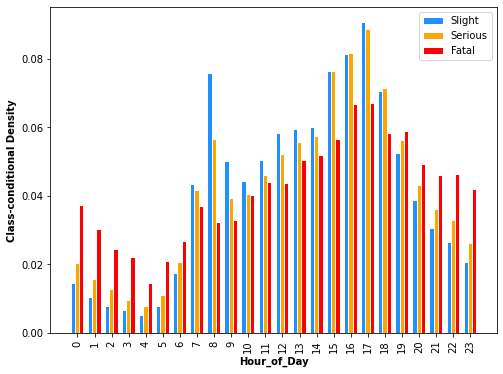

In [ ]:
# Hour_of_Day Histogram
getcounts_as_barplot(n_feature = 8, sort_alphabetically = True)

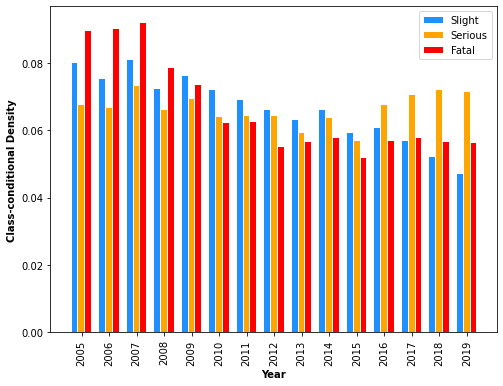

In [ ]:
# Year Histogram
getcounts_as_barplot(n_feature = 9, sort_alphabetically = True)

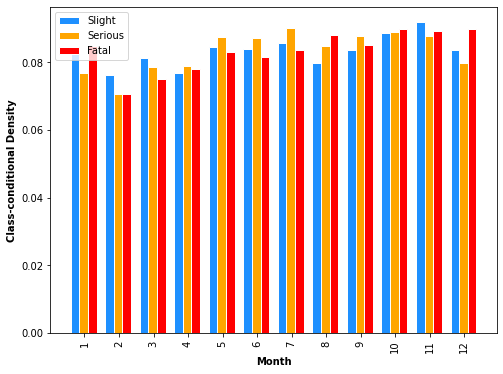

In [ ]:
# Month Histogram
getcounts_as_barplot(n_feature = 10, sort_alphabetically = True)

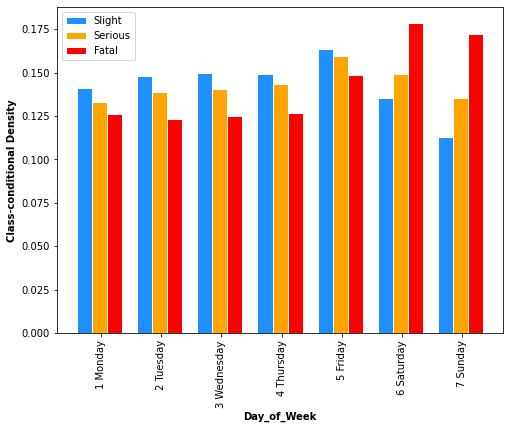

In [ ]:
# Day_of_Week Histogram
getcounts_as_barplot(n_feature = 11, sort_alphabetically = True)

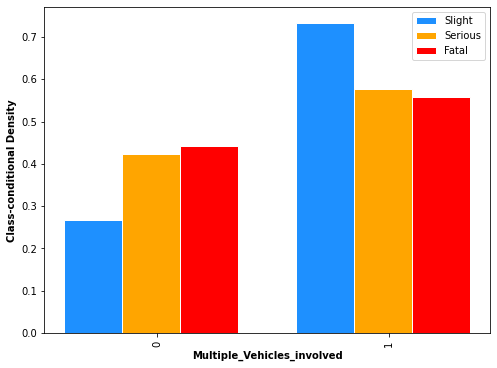

In [ ]:
# Multiple_Vehicles_involved Histogram
getcounts_as_barplot(n_feature = 12, sort_alphabetically = True)

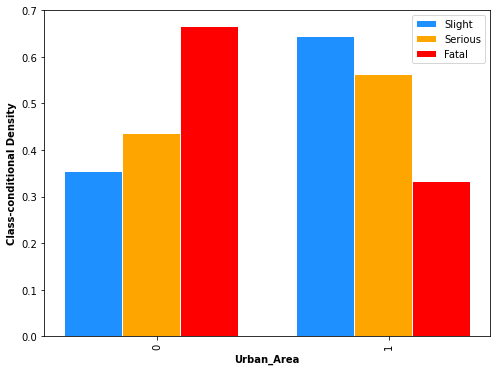

In [ ]:
# Urban_Area Histogram
getcounts_as_barplot(n_feature = 13, sort_alphabetically = True)

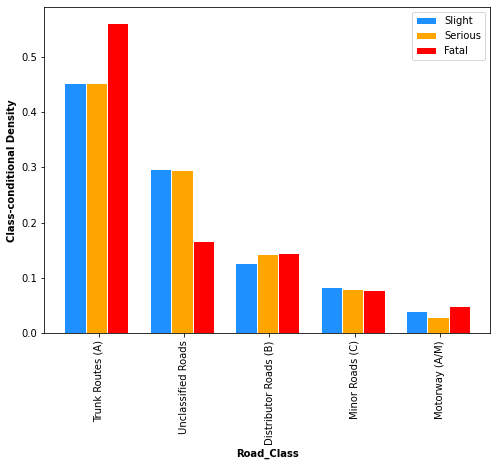

In [ ]:
# Road_Class Histogram
getcounts_as_barplot(n_feature = 2, sort_alphabetically = False)

Looking at the data, we can observe the following: 

Most accidents appear to occur in either 30 mph or 60 mph zones. This indicates two things. On the one hand, many accidents appear to occur in cross-country roads. These roads connect individual towns or villages with each other, but are not actually considered main roads. As such, they are likely to be less developed and, at the same time, still heavily used. With respect to development status (e.g. lights, width of roads, indications, surface), it might be that these roads contract a greater risk of exposure to accidents. Importantly, not only slight, but also more serious injuries appear to peak at this mileage. That might arise from two possibilities. For once, these roads might also be used by non-vehicle types (pedestrians, bikers) which would more quickly suffer more severe injuries following an accident. As such, it might be that many accidents occur in a transgression zone (going from 20 to 30 mph for instance). Secondly, one could assume that speeding is an issue within these zones. As accidents at a speed of 30 mph are less likely to lead to serious injuries when two vehicles collide, the possibility that these accidents often occur with a greater velocity must be considered. The second peak is at 60 mph. Within the UK, such roads are labeled as single carriageways, which are one level below motorways. Such roads are also often constituted as motorways, but also lack more often infrastructural maintenance. As with the 30 mph zones, one could consider that a combination of poor constitution of these roads, large traffic volumes as well as speeding might be responsible for the degree of slight and serious injuries apparent in this setting. 

Most accidents appear to occur during rush hour times in the mornings and afternoons. This is intuitive as an increased traffic volume increases the risk of accident exposure. Further, it can be seen that most more serious accidents, propotionally as well as in real numbers, occur during late afternoon rush hours. Potentially, this is the time when most traffic occurs and individuals are more likely to make mistakes as they are exhausted from work and don't pay the attention required in each situation. Another factor might be impatience. This could occur when people just want to get home or also have to catch up to some plans made in the evening hours. As such, it is likely that stress or time pressure plays a central role in the given accident distribution.

For both month and year, only somewhat strong signals are apparent. Overall, slight accidents appear to partly decline during the years, whereas the rate of more serious incidents appears to remain stable. One reasoning could be that less serious accidents might be better controllable and thus, be better preventable through spreading of awareness, whereas more serious accidents appear to rely on factors which cannot be controlled individually. For months, we don't see any particular pattern. Although it appears as if slight accidents decline throughout holiday seasons, this does not hold for more serious ones. As such, it is likely that both variables do not constitute very appropriate predictors. 

Further, approximately 70 percent of all accidents occurred when multiple vehicles were involved. However, there is only a great discrepancy for slight accidents. For more serious accidents, there appears to be no indication that they occur more frequently when multiple vehicles are involved. This might be since more serious accidents might often occur in settings where drivers do not pay attention to their surrounding environment while being in a higher-speed setting. Cases of such might be driving at times with relatively low commuting volume (such as in the night on a less developed road). As such, if attention span is assumed to be an effective predictor of more serious accidents and if attention is rather given when commuting is intense, then it is likely that such accidents occur also quite frequently in a more remote setting. 

Coming to road classes, most accidents appear to occur in either trunk, or distribution roads (2 is indicated as unknown roads, as such, we are unable to clearly depict its occurance, but assume that these are proportionally distributed to less developed roads - as such no motorways). Trunk roads are the most heavily used form of roads in the UK. They are similar to second-class highways, connecting most major towns and cities. As opposed to motorways, they do not only connect the largest economic areas within the UK, but go a level deeper. Here, normal speed limits of 60-70 mph are given. However, often these roads also lack infrastructural maintenance and are not as developed as motorways. This could give intuition as to why motorways experience such a small accident prevalence (number 5) compared to trunk roads. This would suit the argument made above that technical maintenance of roads might impact accident occurance in multiple ways. On the other hand, we see that distributional roads also experience a more frequent distribution. These are often large minor roads, indicated at 30 mph, which serve as transition roads, leading through less populated areas within towns or between villages. As such, they are also more frequently used by non-motorised vehicles, which would explain why more serious accidents appear to be, proportionally, more prevalent within these roads. 

Lastly, we can observe that accidents occur quite evenly distributed throughout the week, with reaching its peak on Friday. Interestingly, less accidents are reported on Saturday and Sunday, compared to the weekdays. This might also be based on two points. One, traffic is simply lower throughout weekends when people are not using the vehicle for work purposes. Two, traffic might be associated with less stress during weekend periods and people might be less exhausted when using a vehicle. As such, rush hour commuting is less prone. Together, both observations can support the claims made above and help explain the pattern observed. That is, most accidents appear in settings with a large traffic volume, more non-motorised participants at more stressful times and less-developed infrastructures. 

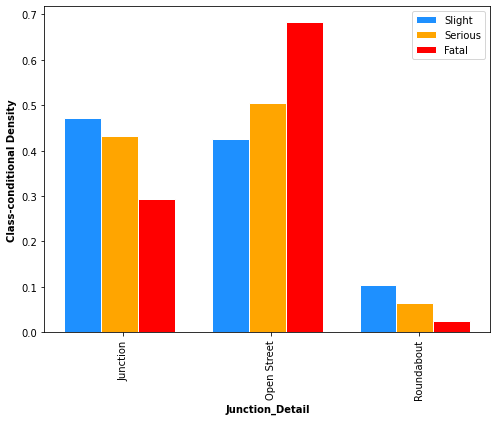

In [ ]:
# Junction_Detail Histogram
getcounts_as_barplot(n_feature = 4, sort_alphabetically = False)

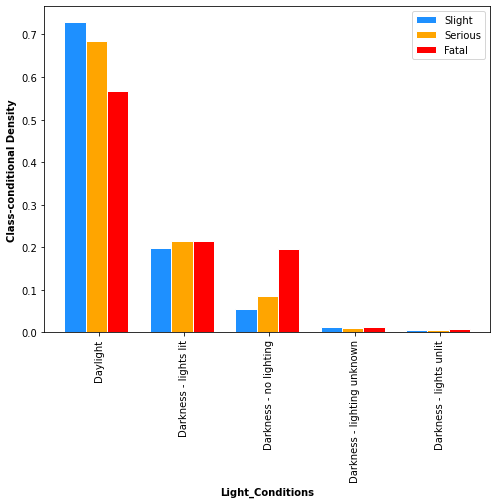

In [ ]:
# Light_Conditions Histogram
getcounts_as_barplot(n_feature = 5, sort_alphabetically = False)

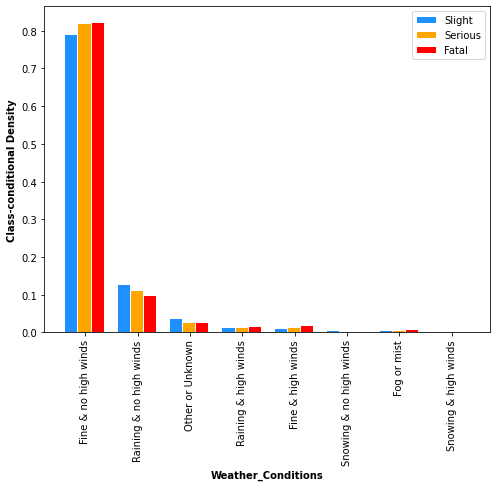

In [ ]:
# Weather_Conditions Histogram
getcounts_as_barplot(n_feature = 6, sort_alphabetically = False)

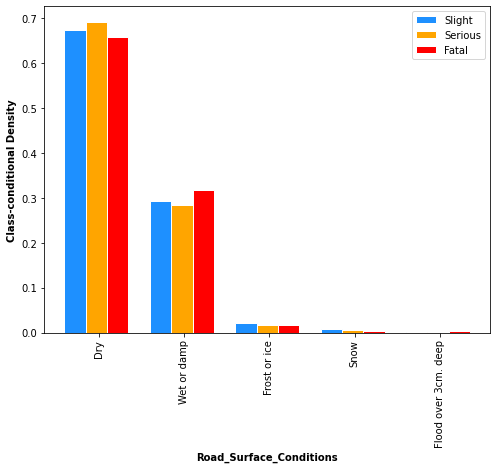

In [ ]:
# Road_Surface_Conditions Histogram
getcounts_as_barplot(n_feature = 7, sort_alphabetically = False)

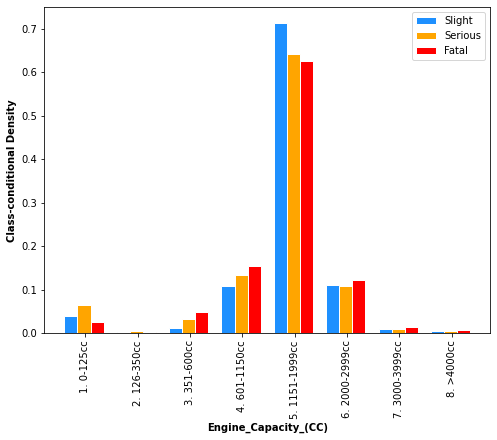

In [ ]:
# Engine_Capacity Histogram
getcounts_as_barplot(n_feature = 17, sort_alphabetically = True)

Looking at the data, we can observe the following. 

First, most accidents appear to occur on open street (1) or at junctions (2), with junctions being responsible for somewhat more slight injuries and open street being responsible for, in absolute and relative terms, more serious accidents. While the latter is quite intuitive, it is still a little surprising that more slight accidents occur within the setting surrounding junctions. One explanation might be that drivers are more focused on open street than on junctions, where speed levels are lower and directions from which vehicles are approaching increase. Thus, they are likely to incoprorate cases of Rear-end or side-way collisions. Also here, one could argue that junctions are potentially less maintained compared to open streets and lack clearness, imposing risks for dead angles or seeing other participants too late. Also, as junctions are likely to occur in a low-speed environment, participants might not pay the amount of attention they would on open street. 

Coming to light conditions, accidents are mostly prevalent for daylight conditions. This is intuitive given the fact that most accidents occur during rush hour times and decline substantially at non-rush hour times. Interestingly, we can observe that, although not as many accidents occur in nighttime conditions, they appear to lead to a greater proportion of more serious accidents. Interestingly, also, is the fact that in settings where darkness is apparent but lights are not lit, the fraction of more serious accidents is highest. As such, it is likely that lack of visibility and too late realisation of a potential collision serves as an indicator to the severity of an accident. Thus, one could argue that, although more situations for potential accidents occur during more visible settings, they are likely to be preventable due to a better visibility and earlier reaction options. 

Looking at weather and road surface conditions, one can see a quite similar image. Most accidents occur in settings where rain or dry weather is apparent. This is intuitive, as the UK is a country in which these are the two most common forms of weather. Interestingly, we do not see any form of increase of accidents under foggy or icy conditions. That is, either these events occur so seldomly that individuals are not exposed to them enough such that a statistical trend is visible, or they are not able to create a "shock moment" (comparable to the spike in accidents in snow rich countries at the time the first snow arrives). Also, it is apparent as if wet weather leads to, proportionally, more serious accidents. Overall, one can say that most accidents occur in ordinary weather settings, and weather and road conditions appear to be somewhat more strongly correlated with each other. 

Lastly, it appears as if most accident observations are given for cars and not motorcycles. This is as quite over 90 percent of accidents occur for class number 5, which is the most common capacity class for cars. 



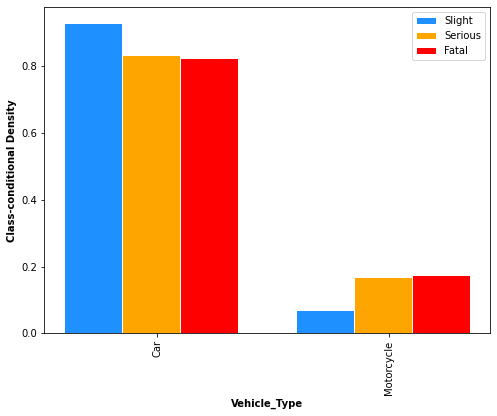

In [ ]:
# Vehicle_Type Histogram
getcounts_as_barplot(n_feature = 14, sort_alphabetically = False)

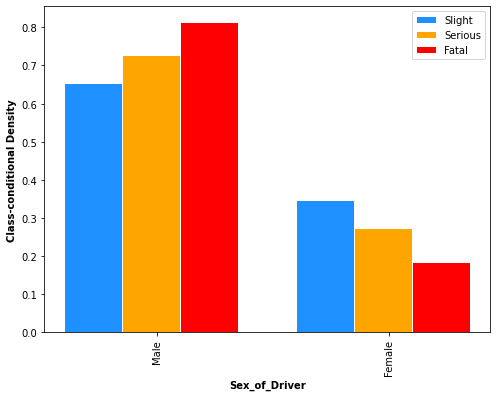

In [ ]:
# Sex_of_Driver Histogram
getcounts_as_barplot(n_feature = 15, sort_alphabetically = False)

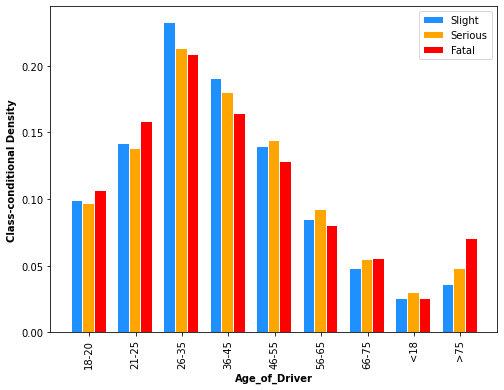

In [ ]:
# Age_of_Driver Histogram
getcounts_as_barplot(n_feature = 16, sort_alphabetically = True)

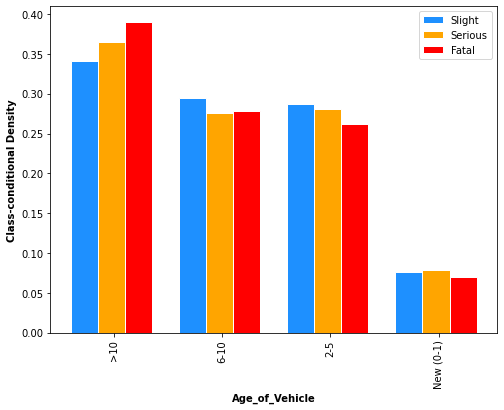

In [ ]:
# Age_of_Vehicle Histogram
getcounts_as_barplot(n_feature = 18, sort_alphabetically = False)

Looking at the data, we observe the following: 

First, we can support the claim made above that mostly cars were observed within the dataset, as most accident were registered with the cars indication. 

Secondly, it appears as if males were responsible of both, more slight and more serious accidents, although the discrepancy for more serious accidents is less extreme. This might be based on two reasons. For once, males might be more frequent drivers and more likely to own a car. As such, they are more frequently represented in traffic and have a higher exposure to accidents. Furhter, males might also be more likely to be less attentive in traffic, less risk-averse drivers or more confident in their driving skills. As such, they might underestimate certain risks or overestimate their ability to forecast and handle situations, which increases the likelihood of being involved in (minor) accidents.

Also, we can observe that there appears to be a strong discrepancy of accident prevalence for new and older vehicles. However, this is only apparent for recently purchased cars vs. cars older than 2 years. This might be twofold. One, car owners of new cars might be more attentive to prevent accidents, as their utility of the car is still large and their appreciation of the good is still strong. On the other hand, it might also be the case that new cars are simply not as common as used cars. That is, their relative occurance in traffic is proportionally lower compared to cars with an increased age. A third reason might also be that new cars have more professional accident preventing systems, such as line recognition or distance measures or driver observation technologies, which could lead to a better support of the driver through forecastability and a non-declining attention span. 

Lastly, we can observe that mostly people between 25 and 45 are causing accidents. This is intuitive when considering that, especially in the UK, these are the most frequent drivers. Especially, these drivers use the vehicle for work purposes and are thus more likely to encounter pyschologically stressful situations, such as in the context of rush hours. Moreover, we can observe that, although they cause less slight accidents, prevalence of more serious accidents is proportionally largest for 18-25 year olds, as was expected. This could result from a combination of lack of experience, over-confidence and, in some instances, consumption of mind-altering substances while driving. Another interesting observation is the prevalence of accidents for individuals younger than 18. However, taking all together, we can still observe that driving appears to be especially vulnerable to accidents in situations where traffic is high and is also due to pschological traits as well as road infrastructure environments. 

All things considered, we can see that accidents are based on a combination of both individually-psychological as well as infrastructural, environment-based factors. To this extent, we observe that features such as gender or age of the driver, road surface conditions, speed limits, time horizon as well as road classes appear to be important predictors of both accident occurance as well as accident levels distinctions. 

## Predictions using Logistic Regression

Having assessed the relations graphically, we now go a step further and attempt to predict the underlying relationship through multiple models. 

The first classification model we use is in the form of a logistic regression. Here, we define a model with an s-formed curve that classifies each observation into a severity index class with a certain likelihood and assigns severity level to the class with the largest likelihood. 

Doing so, we will transform the model into binary features as the logistic regression is unable to work with multi-class features. Also, to increase the interpretability of our factors, we do not drop the first class of our encoded feature variables but instead drop the intercept from our model. In this case, we trade-off interpretability for model definition and fail to fully account for multicollinearity issues due to the reliance on non-dropped indicators. 




In [ ]:
# Reload the data
acc = pd.read_csv('UK_accidents_preprocessed.csv')

# Get the features
features = acc[acc.columns[acc.columns.isin(['Road_Class', 'Junction_Detail', 'Light_Conditions', 
                                             'Weather_Conditions', 'Road_Surface_Conditions', 'Vehicle_Type', 'Sex_of_Driver', 
                                             'Day_of_Week', 'Engine_Capacity_(CC)', 'Age_of_Driver', 'Age_of_Vehicle',
                                             'Multiple_Vehicles_involved', 'Urban_Area', 'Month', 'Year', 'Hour_of_Day', 'Speed_limit'])]]
# Bring them into the desired format
features = features.astype(object)
features[['Multiple_Vehicles_involved','Urban_Area']] = features[['Multiple_Vehicles_involved','Urban_Area']].astype(int)

# Apply one hot encoding to get category-indicating variables for each categorical feature
X = pd.get_dummies(features, drop_first=False).to_numpy()

# Get the label in the right format
y = acc['Accident_Severity'].astype(object).to_numpy()

In [ ]:
# Here, we perform the logistic regression and plot the test accuracy
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LogisticRegression(max_iter=200, n_jobs=-1)
#lr = LogisticRegression(max_iter=200, n_jobs=-1, class_weight='balanced')
#lr = LogisticRegression(penalty='l1', max_iter=200, n_jobs=-1, class_weight='balanced')

# Fit the model
lr.fit(Xtrain, ytrain)

# Get predictions
yhat_lr = lr.predict(Xtest)

# Get the model's test accuracy
test_accuracy_lr = np.mean(yhat_lr == ytest)
test_accuracy_lr

0.8362931107175985

We see that the respective logistic regression model performed quite well. With the data, we retrieve an accuracy of 0.8365, which is quite large considering other classification algorithms. This implies that, of all predicted classifications, we were able to predict nearly 85 of 100 correctly. This includes True Negatives as well as True Positives. As such, we are able to capture a sufficient part of the underlying relationship concerning the feature variables. 

Another interesting implication is to observe the classification accuracy through a precision-recall matrix. Recall that a classification algorithm predicts the probability for each observation to belong to each of the given classes and then chooses the respective class as predicted value for which said probability is largest. Comparing these predictions to the actual values for each class, we can retrieve a matrix consisting of four values for each class. These are True Positives, which is the number of occurances that a predicted value is positive given the actual value is positive, True Negatives, which is the number of occurances that a predicted value is negative given the actual value is negative, False Positive, which is the number of occurances a predicted value is positive given the actual value is negative, and False Negatives, which is the number of occurances a predicted value is negative given its actual value is positive. As such, it is our aim to obtain many of the former two while limiting the number of times we obtain the latter two. 

Given these values, we can form precision and recall calculations. We need to form a precision-recall matrix in our case, since the dataset with which we are operating is imbalanced. As such, most of the observations we obtain are within classification level 1, indicating slight accidents. Thus, the actual True Positive Rate vs. False Positive Rate comparison does not hold a reliable verdict, and purely accuracy oriented metrics might not be of much value. 

As such, we are also unable to simply draw a commonly used tool, called the ROC curve. This is simply because the ROC curve plots TPR vs. FPR. Because TPR only depends on positives, ROC curves do not measure the effects of negatives. As such, if you use the Area under the Curve (AUC) directly from an ROC plot, you do not place more emphasis on one class over the other, so it does not reflect the minority class well. 

To combat this problem, we are using the definitions obtained above. Remember that the definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives. Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant. Because precision is directly influenced by class imbalance, the precision-recall curves are better to highlight differences between models for imbalanced data sets.

Further, we assign a F-beta score. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. 

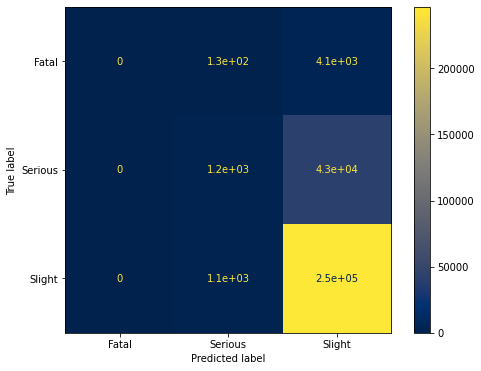

In [ ]:
plot_confusion_matrix(lr, Xtest, ytest, cmap = 'cividis')  

In [ ]:
confusion = confusion_matrix(ytest, yhat_lr)
confusion

array([[     0,    131,   4113],
       [     0,   1248,  43239],
       [     0,   1052, 246692]])

In [ ]:
print(classification_report(ytest, yhat_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00      4244
     Serious       0.51      0.03      0.05     44487
      Slight       0.84      1.00      0.91    247744

    accuracy                           0.84    296475
   macro avg       0.45      0.34      0.32    296475
weighted avg       0.78      0.84      0.77    296475



If we look at the confusion matrix and the subsequent classification report, we can observe that the results are somewhat different from the pure accuracy score. 

First we look at the confusion matrix. Interestingly, the model did never predict any accident to be of class fatal. This is intuitive to some extent, given the relatively low frequency such accidents occured within the data. Overall, we can observe that only 1.5% of all observations included a fatal accident. As such, the model might simply have lacked a sufficient number of observations to accurately define which feature combination distinctively causes a situation in which fatal level accidents are more likely than non-fatal ones. Supporting this claim, one could argue that, throughout all observations, there appears to be no setting in which an individual is more likely to suffer from fatal consequences when involved in an accident than from non-fatal ones. This is intuitive to some extent, given that individuals predominantely would mitigate their risk of exposure to these settings by circumventing such environments and that these environments would have already been reconstructed to mitigate risks of fatal accidents. Thus, it is likely that each feature combination leading to more serious accidents is as likely to lead to only slight accidents.

For us, this implies that we are unable to actually say much in particular on how to predict fatal accidents given the logistic regression algorithm. Further, this gives the first major implication on why a purely accuracy-oriented score is likely to lead to false conclusions on overall prediction accuracy. This bears the consequence of a more selective reasoning. In order to assess whether this failure to assign fatal status to accident severity, one could bear several considerations. On the one hand, one could claim that the model is not entirely sufficient given that it is unable to predict each kind of accident severity. If one was to only look at prevention for fatal accidents, then clearly we could not work with the given model. On the other hand, one could argue that, as the proportion of fatal to overall accidents is barely 1.5%, and since the data catches a large number of accidents throughout the entire UK over a multiple-year horizon, a threshold of only 16'632 fatal accidents is already at an acceptable level regarding traffic fatality. Given that it is likely that earlier studies and prevention campaings aimed specifically at reducing the number of most serious accidents, one could argue that this number is the result of the effectiveness of said programs. As such, it might be more useful to attempt predicting only serious or even slight accident patterns, given their large prevalence and, absolutely speaking, large costs they may cause, both socially as well as financially. 

Looking at serious accidents, we find mixed results. On the one hand, we can observe that precision is slightly above 50%. This indicates that the model assigned in slightly more than half of the cases a correct positive verdict. Looking at it from a prevention-only perspective, this is not necessarily a bad, but rather an inefficient, result. Given that more serious accident predictions would likely cause decision-makers to increase prevention efforts into these situations, one could argue that too much is better than too little. However, it would become serious if financial resources are constrained and, as such, an efficient allocation of funds is necessary. On the other hand, we find that the recall measure is practically zero. This implies that the model assigned many times a slight accident status to situations in which a serious accident occured. In the case of accident prevention, this is not optimal. Comparing to the situation described before, we would now obtain many feature combinations in which accidents would be predicted as not serious enough. As such, an inoptimally low allocation of funds could be sent to situations in which these combinations are prevalent, potentially underestimating the danger they pose. By being unable to actually depict the number of relevant observations accurately, we thus should be even more careful in allocating too much weight to the accuracy measure. Especially, we now can support the claim made above that many situations which can be labeled as serious might also be labeled as slight and that, consequently, the exact allocation of severity status depends likely on many more parameters than the ones we obtained in our set. 

Now, looking at all scores, we obtain an unweighted (macro-oriented) as well as a weighted average of F1 scores. Depending on the policy setting we would like to observe, we can choose these values accordingly. If we want to focus on the total financial and social consequences of accidents and assign each accident severity an approximately equal severe psychological outcome, one could argue that a weighted average of all scores would be sufficient to estimate the efficiency of our model. As such, being able to predict less serious situations with substantial accuracy might lead to a desired reduction in overall accident rates and could subsequently decline total costs resulting of all accidents decline. This would be similar to a prevention strategy in which it is the aim to reduce only minor costs but at a large scale. Then, we could use the weighted F1 score of 0.77, which is roughly 8 percentage points lower than the initial accuracy metric obtained. However, if it is the aim to primarily prevent more serious accidents, and if it is thought that the psychological consequences of different severity levels are heterogeneous, then using a model which is likely to underestimate accident severity of slight and serious character might not be a good idea. Also, if the financial consequences of serious accidents are disproportionally larger, then a potential reduction in less severe accidents might not outweigh the remaining costs caused by serious accidents. As such, one would be better off by using the macro average and obtain a score of 0.34, which is substantially lower than the two previous scores. 

However, a third option would be to only regard results within accident severity categories of 1 or 2 and disregarding lethal accidents. This is based on the claim made above in which lethal accidents are either at such a low level already or that they constitute characteristics which are not distinctively measurable and thus cannot clearly be predicted. In this case, one could simply take the non-weighted average of the first two categories, given that one would want to take into consideration the very low recall value given for serious accidents. As such, we would obtain a F1 score of 0.48. Depending on the extent to which one would like to weight these False Negatives for serious accidents, one could individually assign weights to both scores. This would depend on the argument made above, in which one must trade-off the consequences, both financially as well as socially, of prevention efforts into any category. 

### Feature Selection with a Logistic Regression Model

As we have seen, the overall prediction accuracy of our model depends on a number of individual considerations. However, we are also interested in depicting which features are more likely to assign prediction. This information could aid decision-makers in deciding which feature combinations they should particularily pay attention to when designing or evaluating the risk a situation could pose on traffic incidents. As such, we will follow two strategies to assess feature importance. 

On the one hand, we use the magnitude of coefficients to select importance. In this case, the higher a coefficient, the more important it is on assigning prediction status. Remember that we assigned a binary feature to each variable. Thus, the number of features increases dramatically. In order to obtain the relevance of each feature, we simply rank the features according to their size to see which were more prominent in assigning accident status. 




As we can see, we obtain 120 features in a binary format. We now want to assess which features are a dummy for which baseline predictor variable. Doing so requires us to identify which binary feature belongs to which parameter we introduced. Importantly, we can only do this for each of the three classes separately. As such, it is important to understand which parameter is a strong predictor for each class separately and, in a next step, combine the information obtained from each class. Let's first obtain the results for the coefficients for class 1, implying slight accidents. 

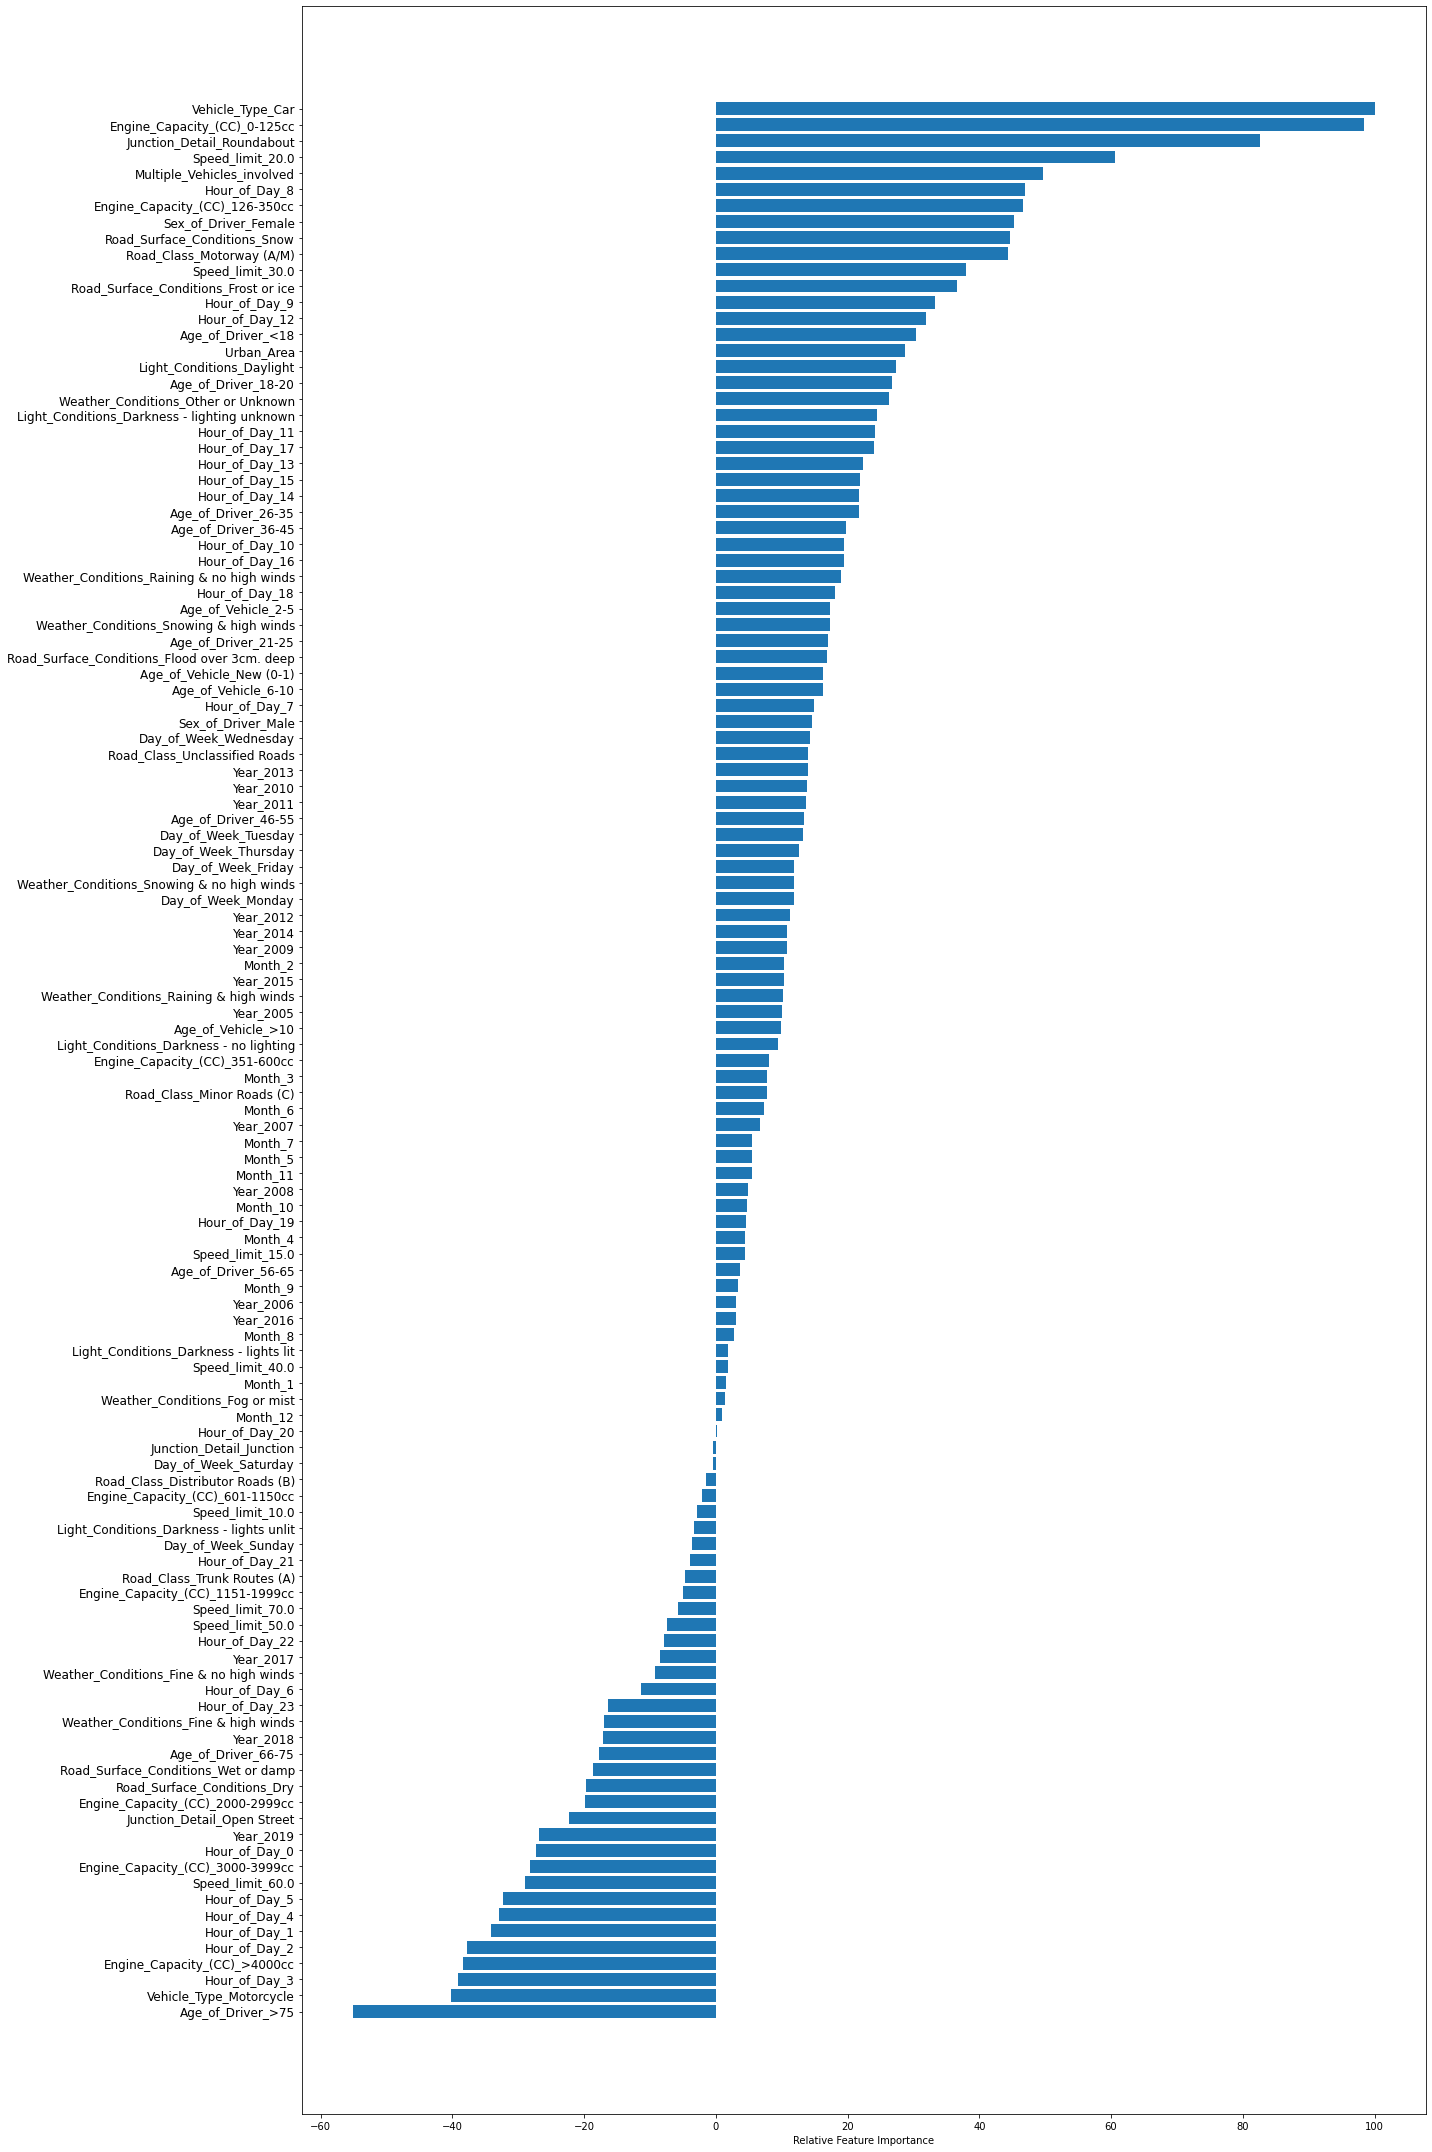

In [ ]:
# Feature importance: Slight ACCIDENTS

X = pd.get_dummies(features, drop_first=False)
feature_importance = lr.coef_[2]
feature_importance = 100.0 * (feature_importance / abs(feature_importance.max()))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### Relative Feature Importance for Slight accidents 

The above figure shows the features ranked according to the explained variance each feature contributes to the model. In this case the features are plotted against their relative importance, that is the percent importance of the most important feature (i.e. the feature with the largest coefficient in absolute terms).

As we can observe, the most important predictor variables appear to be of Vehicle Type, Engine Capacity, Road Class, Urban Area environment as well as Time of Accident. We first focus on vehicle type. As we can see, driving a car is an important predictor of a slight accident. As we will outline in the section on lethal accidents, this does not necessarily imply that cars are more likely to cause less severe accidents. Rather, one may hypothesize that due to its historical distribution, the model assigned a large predictive ability to this factor based on its disproportional prevalence of slight accidents compared to more serious accidents. A similar verdict can be made on the road category "Motorways", which is the road class with the highest speed limit. Looking at Engine Capacity and Speed Limit, it is intuitive to assume that agents causing an accident either with a low capacity instrument or in a low speed environment are less likely to cause a substantial form of damage, mainly based on the situation's physical restraints. This can be supported by the roundabout indication, which poses a traffic situation that is predominant in a low-speed environment. Moreover, we can see that more extreme road surface conditions, such as frost or snow, are also an indication of slight accidents. This may also be intuitive, as these are situations which, in the United Kingdom, are rather rare events. As such, traffic agents are less experienced within this terrain and thus more likely to act incorrectly. On the other hand, one could argue that, especially because these situations act as a surprising factor, agents behave even more carefully, which would mitigate the potential for greater severity. Lastly, one can observe that rush hour morning traffic is more likely to lead to slight accidents. This may be based on the notion that traffic amount is largest around this time. Further, as people are in a stressful situation, they are more likely to make mistakes. As such, we can follow up on the argumentation that a combination of psychological stress and traffic prevalence is likely to be a combination that increases the likelihood of accidents. Interestingly, as we can see below, afternoon rush hour is a predictor of more severe accident status, which might allow the interpretation that awareness, rather than traffic prevalence and amount, is a more important predictor of severity status, since agents are not exhausted from work in the morning hours. 

Looking at all the variables, we can assume that the model created a pre-selection process which is intuitive when considering natural traffic behaviour and characteristics.

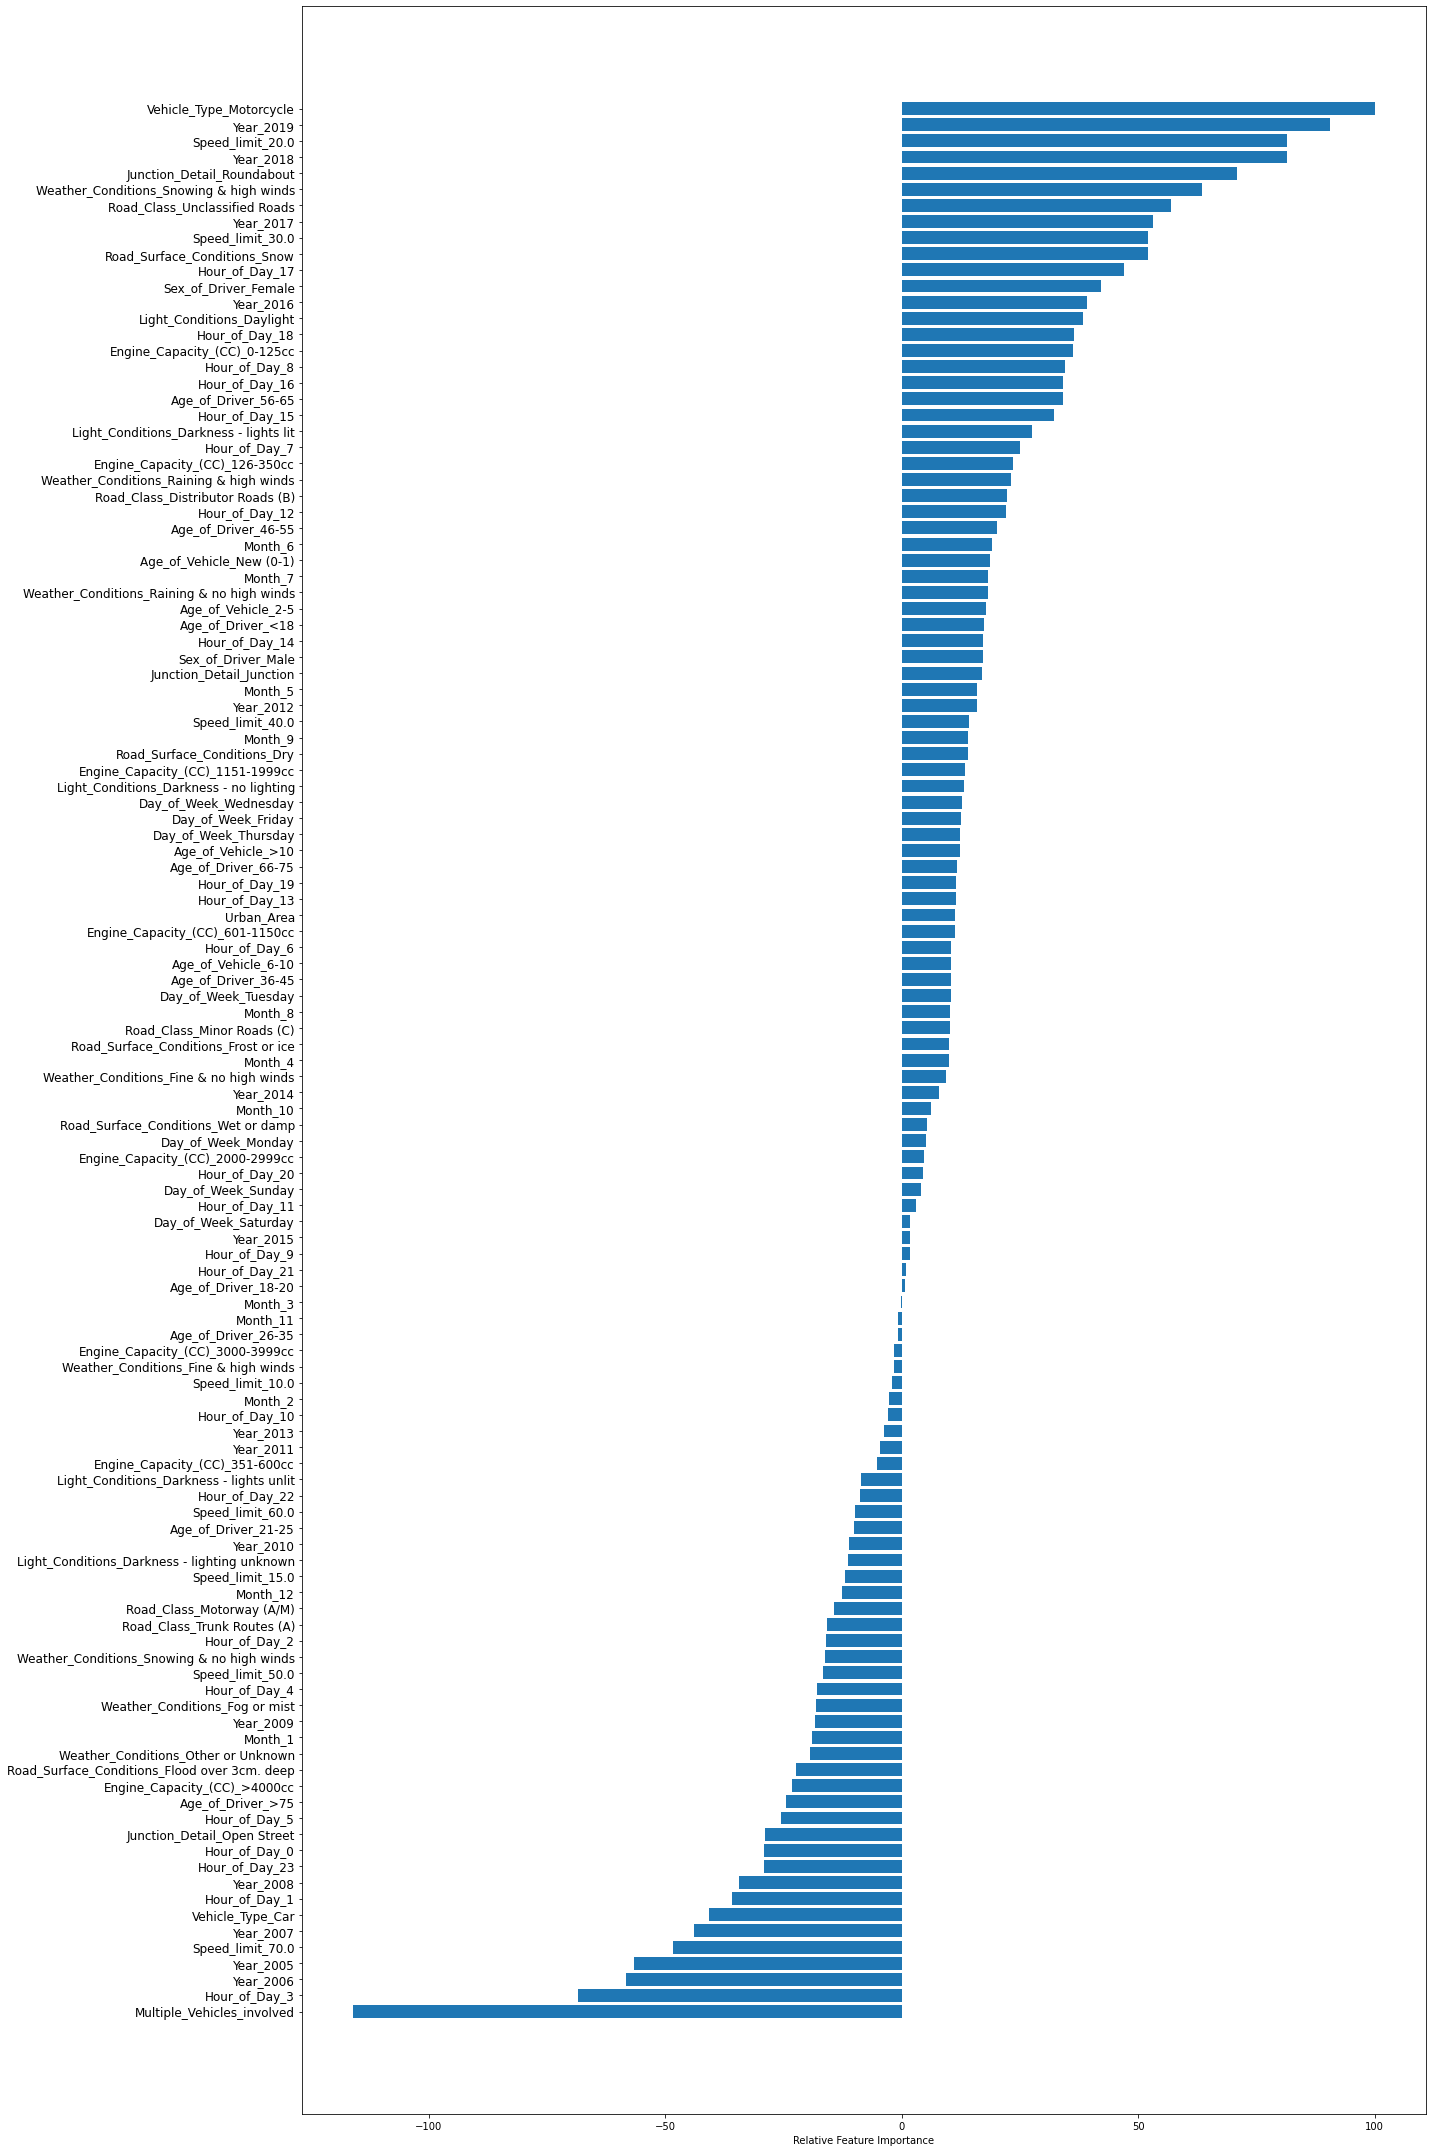

In [ ]:
# Feature importance: SERIOUS ACCIDENTS

X = pd.get_dummies(features, drop_first=False)
feature_importance = lr.coef_[1]
feature_importance = 100.0 * (feature_importance / abs(feature_importance.max()))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### Relative Feature Importance for Serious accidents 

As it is applicable, we can observe that roughly similar feature variables are responsible for class assignment likelihoods as above, but, importantly, these variables are often of an opposite sign. As such, we can observe that also Vehicle Type, Engine Capacity, Speed Limits, Hour of Day as well as Weather Conditions are prominent feature variables. Interestingly, we can also observe a positive time trend on more serious accidents, implying that, overall, more serious accidents tended to increase throughout the observational period (which is, as stated, the opposite of the trend for slight and fatal accidents). If we neglect the time trends, then we can observe that an indication of motorcycles, Speed Limits, Rush Hour times as well as accident that occurred without involvement of multiple participants appear to have the strongest variation. In this case, the coefficients for all three variables are positive. This is also intuitive, and, more importantly, these observations complement the reasoning given when considering slight accident situations. Especially, the 20 mph zone and indication of motorcycles appears to be a strong predictor for more serious accidents, supporting the fact that non-car participants are exposed to a greater risk in being more seriously injured. Also, following the statement given in the data analysis part, one could argue that many more serious accidents occur when people are in situations in which they do not necessarily have to focus (by driving e.g. alone a non-maintained road after work without great traffic) or are in situations that inflict great stress on them (e.g. in the case of rush hour stress).

Overall, we can observe that mostly the hour of the day, speed limits, involvement of low capacity vehicles, extreme weather conditions, large engine capacity or junction details within lower-speed environments (such as within towns) appear to be larger signals on accident classification when considering the two most prominent accident classes.

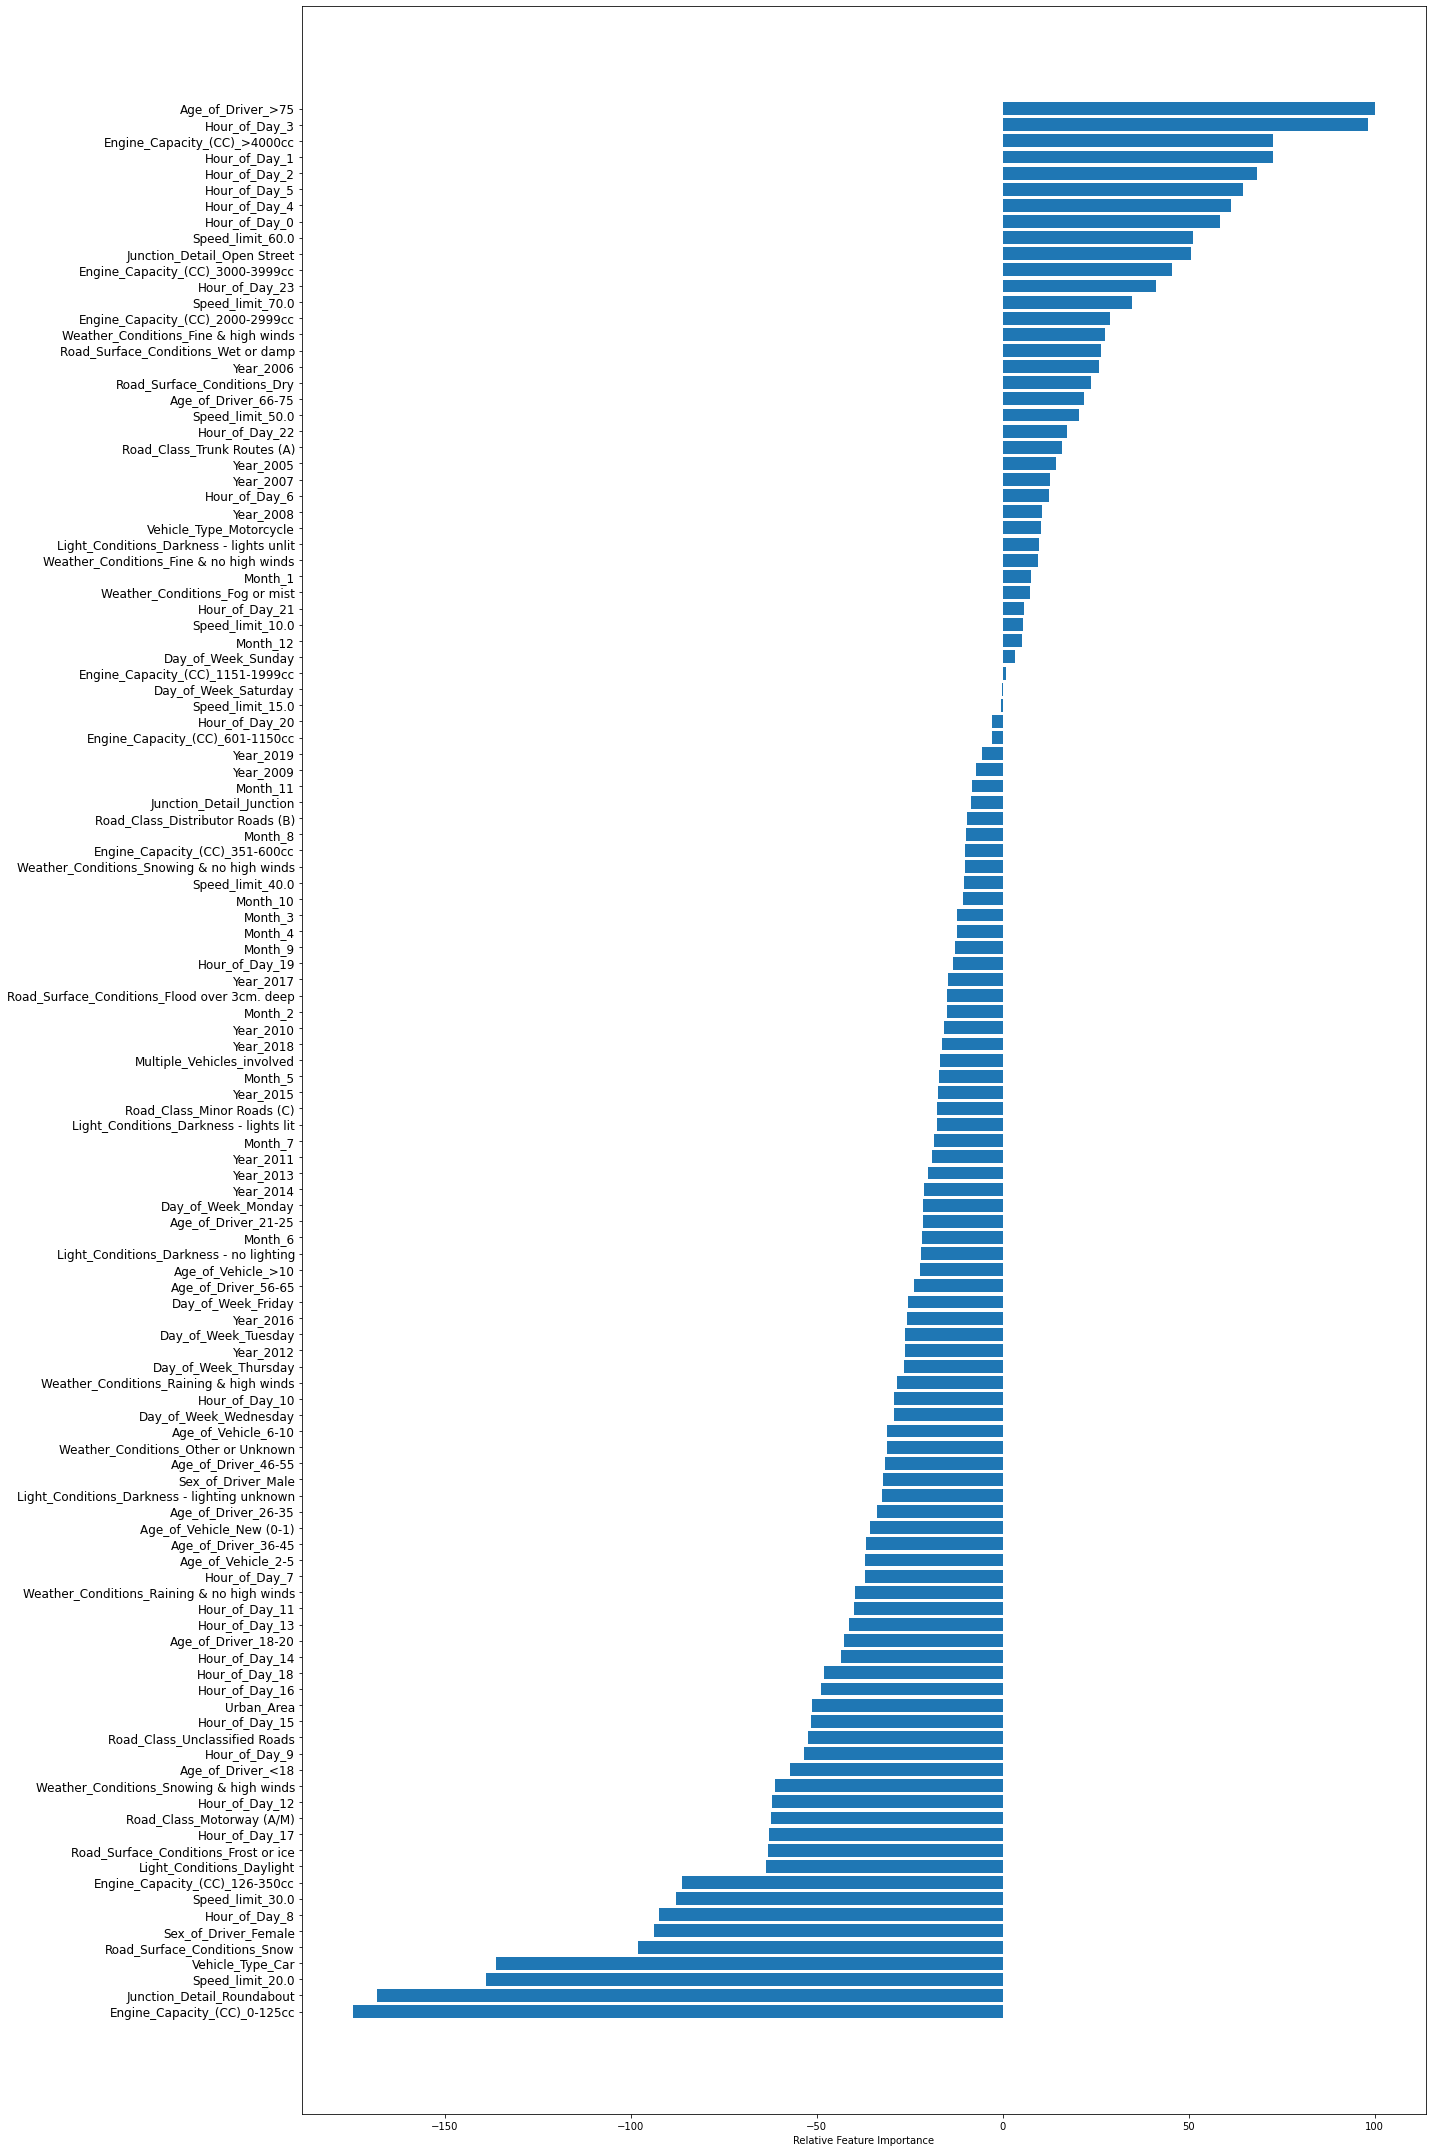

In [ ]:
# Feature importance: Fatal ACCIDENTS

X = pd.get_dummies(features, drop_first=False)
feature_importance = lr.coef_[0]
feature_importance = 100.0 * (feature_importance / abs(feature_importance.max()))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### Relative Feature Importance for fatal accidents 

Although our model is unable to predict any observation to be in classified as lethal, it might nevertheless be interesting to observe which features are, comparably speaking, more prominent in assigning this level. This is based on the notion that, despite stronger feature importance for the remaining two classes, one can still gain some understanding on which characteristics could signal lethal accidents but also happen to occur in situations which signal less serious levels. As such, they can be regarded as complementary.

In our case, we can observe that only relatively few binary feature variables obtain a substantially large importance. Interestingly, we can observe that the dispersion of feature variables is roughly mirrored compared to the case of slight accidents. As such, we can see that binary features with a relative importance of larger than 40 percent arise from 9 original features (i.e. Engine Capacity, Junction Detail, Age of Driver, Sex of Driver, Speed Limit, Hour of Day, Road Surface Conditions as well as Urban Area indicators). If we dig deeper into these features, we can observe that Engine Capacity of 0-125 cc, Junction Details as well as a Speed Limit of 20 mph are the strongest, and also all negative. As such, they can be interpreted as coefficients which indicate that these attributes cause the model to decline the likelihood to put an observation into accident level lethal. This is intuitive, as a low capacity observation might indicate small motorcycles involved in an accident, a participant less likely to be the causing factor of a lethal accident. Further, we see that small speed limits or urban area locations, as well as an environment including a roundabout, cause the model to decline the likelihood of an observation belonging to the lethal class. This is also intuitive, given that in these areas, the afore-mentioned participants are more likely to be prevalent and an agent's velocity is comparatively small. Another interesting observation is that females apparently cause less lethal accidents compared to their male counterparts and are thus also a declining factor for this class. Somewhat surprisingly, we observe that car appears to be a predictor which reduces the likelihood of lethal classification. This might be twofold. For one, compared to motorcycles, cars are more secure, can withstand a greater damage and protect a traffic agent to a greater extent. Further, prevalence of a negative sign for this category does not necessarily imply that it is less likely to lead to fewer lethal accidents, but rather that it is as, or even more, likely to lead to a different status based on the historical distribution of accident severity. As such, the model is likely to assign a negative sign in this class due to the disproportional prevalence of the variable in different classes compared to the class of interest. Ultimately, we can observe that larger engine capacity, higher speed limits as well as night time are important predictors of lethal accidents. All these factors are intuitive. On the one hand, we were able to show that situations including declining speed limits are an important predictor against lethal status. Accordingly, one should expect that the ability to follow a higher speed should serve as the opposite indication. In addition, one should argue that night time hours act as a factor for driver's awareness as well as road environment, both which, as previously argued, in case of a deteriorating status, are likely to be important predictors of severity status.

#### Feature Importance and Signals

Overall, one can observe that many of the originally selected variables appear to have an impact in assigning accident status, both on a general as well as a severity-specific level, although the latter appears to be more dominant. As such, it is apparent that, from this model, decision-makers should rather focus on factors which are prominent for one specific accident type, instead of attempting to mitigate accidents by improving feature conditions which are applicable for all levels. Especially in combination with the classification report described above, one must compare the overall prediction accuracy of the model with more nuanced levels and then create a combined metric in which one assesses both prediction levels as well as feature importance. In the case of a logistic regression framework, it might be most useful to focus on slight and serious accidents, while incorporating less feature types for serious levels, as the model appeared to be less precise and induced a lower recall metric. 

It is important to state that we only partially controlled for multicollinearity issues through correlation but did not execute some forms of feature dependence measures. Also, we did not work on any imputation strategies such as given by Tree bases models. In this case, we solely looked at variable importance from a statistic perspective and disregarded, to some extent, the stepwise feature selection process. As such, we did not fully account for the issues mentioned above. Thus, although the features selected by the model to have the largest impact on level assignment appear to be intuitive, there still might be some statistical caveats which cannot be controlled for by using this type of model. However, we will introduce different methods to account for this in subsequent models. 